## Diamond Price Prediction

Introduction About the Data:

The Dataset The goal is to predict price of given dimaond(Regression Analysis).

There are 10 independent variables (including id):
1. Carat: a weight of the cubic zirconia. A metric “carat” is defined as 200 milligrams.
2. Cut:  describes the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3. Color:  refers to the color of the cubic zirconia. With D being the best and J the worst.
4. Clarity: refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF,    VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
5. Depth:  the height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Table:  the width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. X:  Length of the cubic zirconia in mm.
8. Y:  Width of the cubic zirconia in mm.
9. Z:  Height of the cubic zirconia in mm.

Target varibale:

Price:  the Price of the cubic zirconia.



In [1]:
import pandas as pd

In [3]:
#Data Ingestion
df = pd.read_csv('data/gemstone.csv')
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [6]:
df.isnull().sum()

id           0
carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

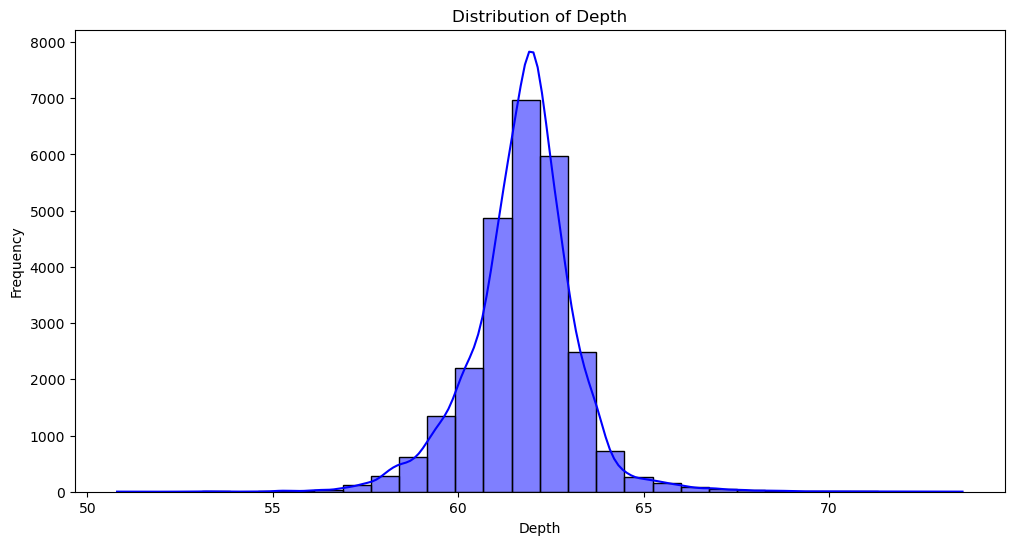

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'depth' column
plt.figure(figsize=(12, 6))
sns.histplot(df['depth'], kde=True, color='blue', bins=30)
plt.title('Distribution of Depth')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.show()




The distribution of the depth column appears to be fairly normal, with a slight right skew. 

In [10]:
# Impute missing values in the 'depth' column with the median
df['depth'].fillna(df['depth'].median(), inplace=True)


In [11]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       26967 non-null  int64  
 1   carat    26967 non-null  float64
 2   cut      26967 non-null  object 
 3   color    26967 non-null  object 
 4   clarity  26967 non-null  object 
 5   depth    26967 non-null  float64
 6   table    26967 non-null  float64
 7   x        26967 non-null  float64
 8   y        26967 non-null  float64
 9   z        26967 non-null  float64
 10  price    26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [13]:
# Lets drop the id column
df = df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [14]:
## check for duplicated record
df.duplicated().sum()

34

In [15]:
duplicates = df[df.duplicated()]
print(duplicates)


       carat        cut color clarity  depth  table     x     y     z  price
4756    0.35    Premium     J     VS1   62.4   58.0  5.67  5.64  3.53    949
6215    0.71       Good     F     SI2   64.1   60.0  0.00  0.00  0.00   2130
8144    0.33      Ideal     G     VS1   62.1   55.0  4.46  4.43  2.76    854
8919    1.52       Good     E      I1   57.3   58.0  7.53  7.42  4.28   3105
9818    0.35      Ideal     F     VS2   61.4   54.0  4.58  4.54  2.80    906
10473   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
10500   1.00    Premium     F    VVS2   60.6   54.0  6.56  6.52  3.96   8924
12894   1.21    Premium     D     SI2   62.5   57.0  6.79  6.71  4.22   6505
13547   0.43      Ideal     G     VS1   61.9   55.0  4.84  4.86  3.00    943
13783   0.79      Ideal     G     SI1   62.3   57.0  5.90  5.85  3.66   2898
14389   0.60    Premium     D     SI2   62.0   57.0  5.43  5.35  3.34   1196
14410   1.00  Very Good     D     SI1   63.1   56.0  6.34  6.30  3.99   5645

In [16]:
df.drop_duplicates(inplace=True)


In [17]:
df.duplicated().sum()

0

In [18]:
## segregate numerical vs categorical column
numerical_column = df.columns[df.dtypes!='object']
categorical_column=df.columns[df.dtypes=='object']
print("Numerical_column",numerical_column)
print("categorical_column",categorical_column)

Numerical_column Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical_column Index(['cut', 'color', 'clarity'], dtype='object')


In [19]:
df[categorical_column].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [20]:
# we see the value count to understand it is imbalanced or not
df['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [21]:
df['color'].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [22]:
df['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

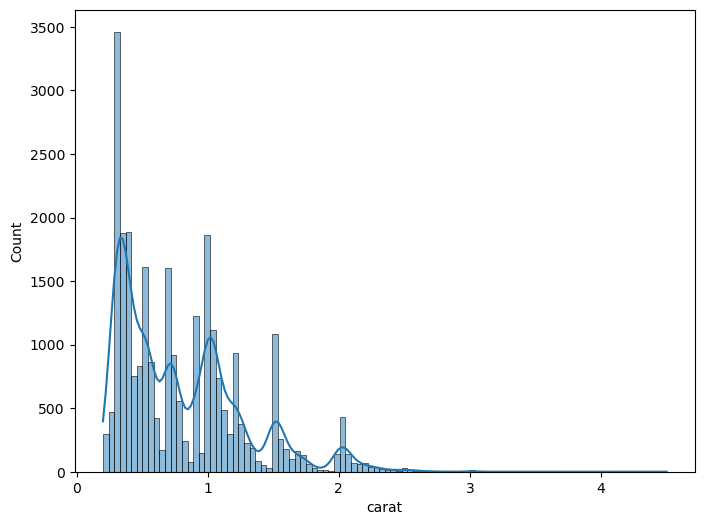

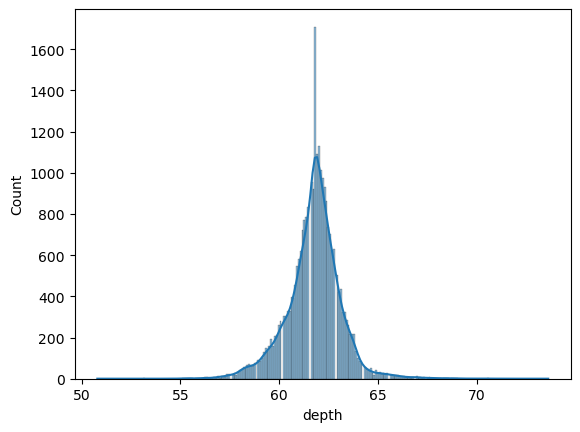

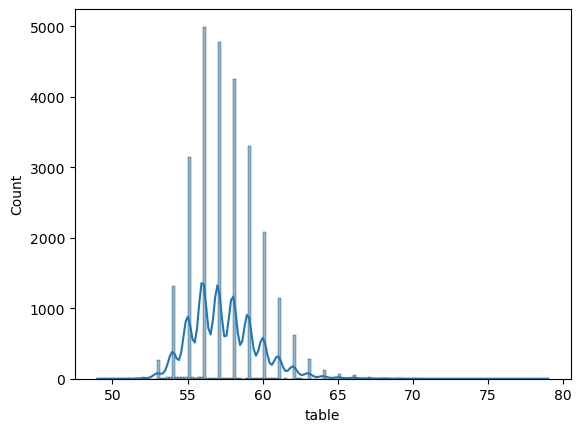

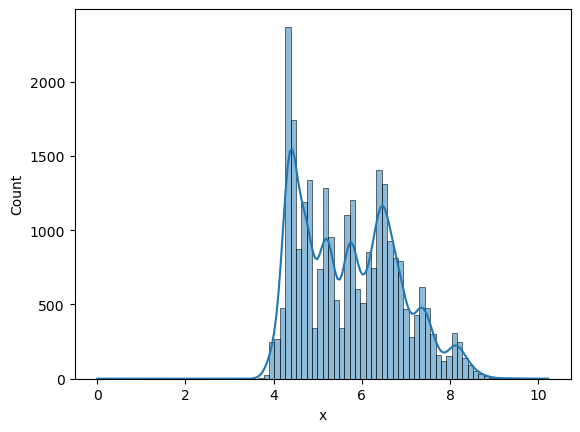

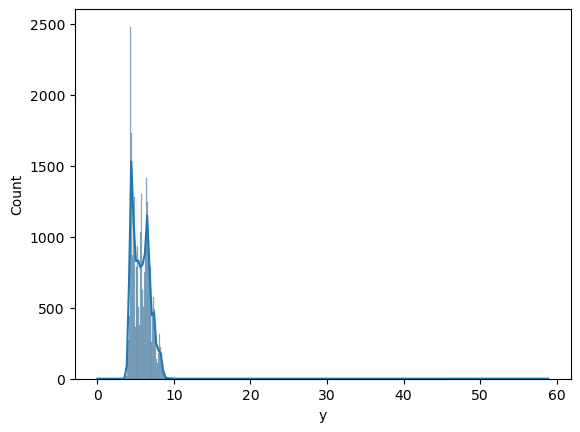

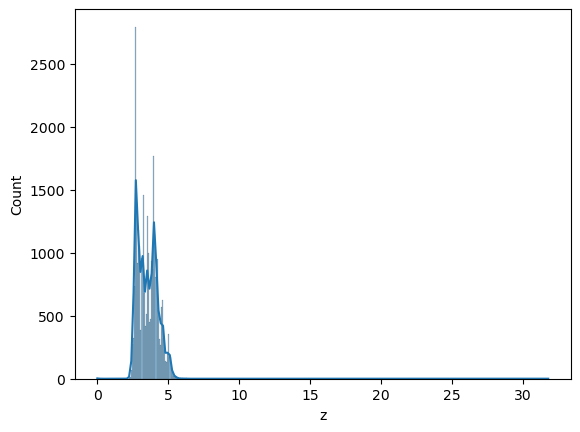

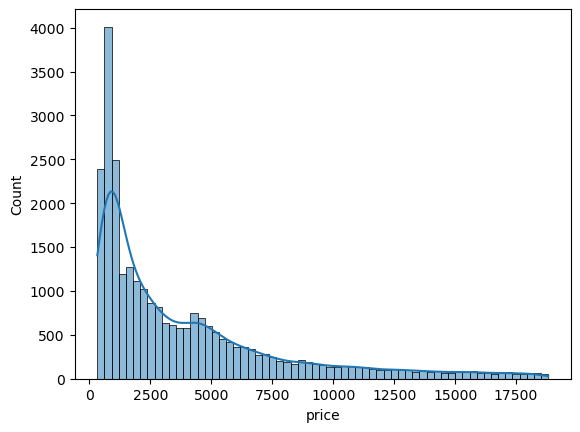

In [24]:
# see the numerical column hist plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
x=0
for i in numerical_column:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

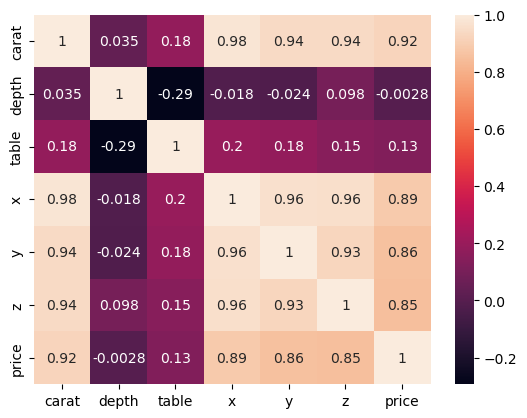

In [25]:
# corelation
sns.heatmap(df[numerical_column].corr(),annot=True)

In [26]:
# now here from correlation i can find which features i can delete
# i can delete the features that have a correlation with the target variable
# if independent and dependent features are highly correlated we should keep that feature
# so here x,y,z are highly correlated among them so we can drop



In [27]:
df.head

<bound method NDFrame.head of        carat        cut color clarity  depth  table     x     y     z  price
0       0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1       0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2       0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3       0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4       0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
26962   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52  4.09   5408
26963   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42  2.74   1114
26964   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15  3.17   1656
26965   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20  2.60    682
26966   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88  4.27   5166

[26933 rows x 10 columns]>

In [28]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [30]:
# from domain information we put the rank to variable
# https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/


In [31]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [32]:
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [33]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"VVS2":6,"VVS1":7,"IF":8}

In [34]:
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [35]:
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [36]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [38]:
# all categorical feature get converted to numerical feature
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
